In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data= pd.read_csv("netflix_titles.csv")

In [7]:
data.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [9]:
data.tail()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [13]:
data.columns


Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [14]:
data.shape

(8807, 12)

In [16]:
data.info


<bound method DataFrame.info of      show_id     type                  title         director  \
0         s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1         s2  TV Show          Blood & Water              NaN   
2         s3  TV Show              Ganglands  Julien Leclercq   
3         s4  TV Show  Jailbirds New Orleans              NaN   
4         s5  TV Show           Kota Factory              NaN   
...      ...      ...                    ...              ...   
8802   s8803    Movie                 Zodiac    David Fincher   
8803   s8804  TV Show            Zombie Dumb              NaN   
8804   s8805    Movie             Zombieland  Ruben Fleischer   
8805   s8806    Movie                   Zoom     Peter Hewitt   
8806   s8807    Movie                 Zubaan      Mozez Singh   

                                                   cast        country  \
0                                                   NaN  United States   
1     Ama Qamata, Khosi Ngema, Gail Mab

In [18]:
data.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

In [22]:
data.isnull().sum()


show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [25]:
data[['title', 'type', 'duration']]

,title,type,duration
0,Dick Johnson Is Dead,Movie,90 min
1,Blood & Water,TV Show,2 Seasons
2,Ganglands,TV Show,1 Season
3,Jailbirds New Orleans,TV Show,1 Season
4,Kota Factory,TV Show,2 Seasons
...,...,...,...
8802,Zodiac,Movie,158 min
8803,Zombie Dumb,TV Show,2 Seasons
8804,Zombieland,Movie,88 min
8805,Zoom,Movie,88 min


In [27]:
data.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [31]:
data['release_year'] = pd.to_numeric(data['release_year'], errors='coerce')

C:\Users\swaru\AppData\Local\Temp\ipykernel_14580\210647019.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=type_counts.index, y=type_counts.values, palette='pastel')


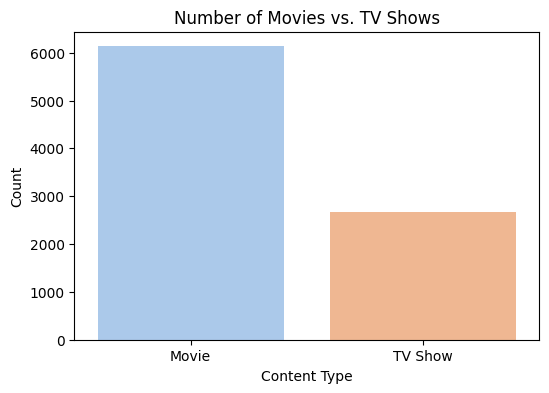

In [33]:
type_counts = data['type'].value_counts()
plt.figure(figsize=(6,4))
sns.barplot(x=type_counts.index, y=type_counts.values, palette='pastel')
plt.xlabel("Content Type")
plt.ylabel("Count")
plt.title("Number of Movies vs. TV Shows")
plt.show()

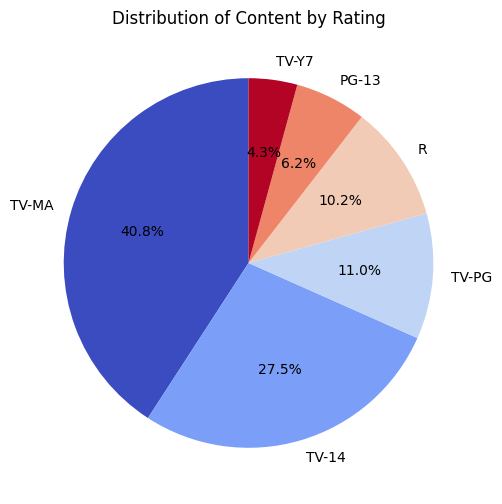

In [35]:
rating_counts = data['rating'].value_counts().head(6)
plt.figure(figsize=(6,6))
rating_counts.plot(kind='pie', autopct='%1.1f%%', cmap='coolwarm', startangle=90)
plt.title("Distribution of Content by Rating")
plt.ylabel('')
plt.show()

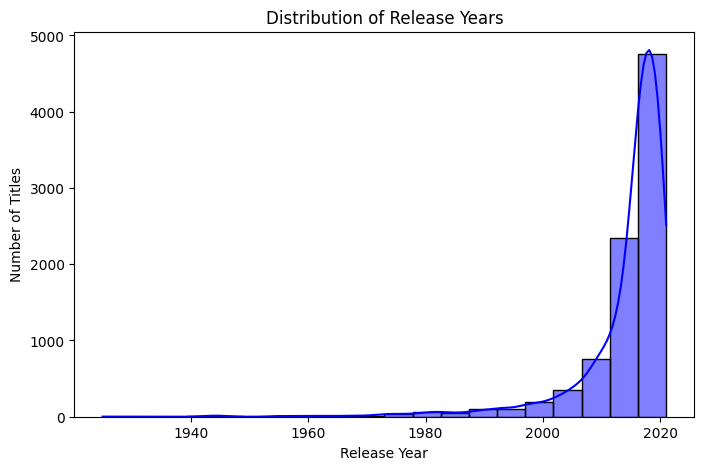

In [39]:
plt.figure(figsize=(8,5))
sns.histplot(data['release_year'].dropna(), bins=20, kde=True, color='blue')
plt.xlabel("Release Year")
plt.ylabel("Number of Titles")
plt.title("Distribution of Release Years")
plt.show()

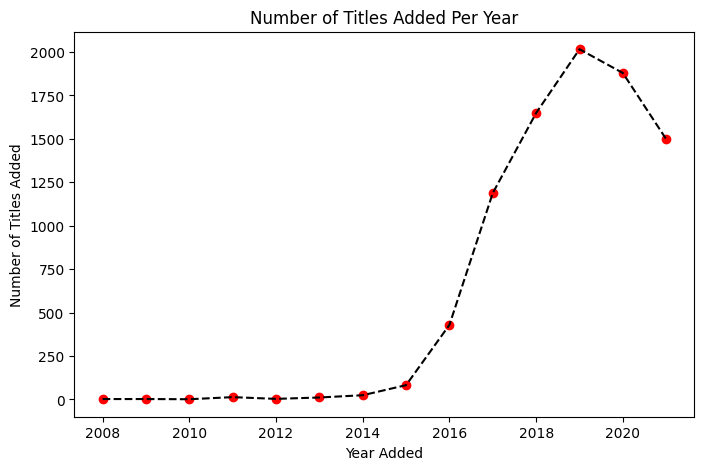

In [41]:
# Scatter Plot: Number of shows added per year
data['date_added'] = data['date_added'].astype(str).str.strip()
data['date_added'] = pd.to_datetime(data['date_added'], errors='coerce')
data['year_added'] = data['date_added'].dt.year
year_counts = data['year_added'].value_counts().sort_index()
plt.figure(figsize=(8,5))
plt.scatter(year_counts.index, year_counts.values, color='red')
plt.plot(year_counts.index, year_counts.values, linestyle='--', color='black')
plt.xlabel("Year Added")
plt.ylabel("Number of Titles Added")
plt.title("Number of Titles Added Per Year")
plt.show()